In [1]:
import pandas as pd
df = pd.read_csv("final.csv",encoding='UTF8')

In [2]:
df

,화재발생일시,화재발생_연,화재발생_월,화재발생_일,주말여부,화재발생시간대,시군구명,읍면동명,발화지점,날씨,...,출동소요시간,현장소방서거리,현장안전센터거리,현장소방지역대거리,전체인력수합계,화재진압시간,동원장비수,인명피해수,재산피해금액,피해면적
0,2011-01-22 23:35:00,2011,1,22,1,21~24,강릉시,죽헌동,산정상,맑음,...,1700,9,9,0.0,37,1800,8,0,0,0.30
1,2011-01-31 18:13:00,2011,1,31,0,18~21,양양군,현남면,산아래,맑음,...,1615,43,13,0.0,1872,155952,71,0,184330,30.00
2,2011-02-11 17:50:00,2011,2,11,0,15~18,홍천군,내촌면,산중턱,구름많음,...,2240,37,37,7.0,171,20500,9,0,4864,0.30
3,2011-02-12 06:18:00,2011,2,12,1,3~6,원주시,귀래면,산중턱,구름많음,...,2019,20,20,8.0,94,35009,9,0,50,0.30
4,2011-02-26 16:42:00,2011,2,26,1,15~18,원주시,태장동,산정상,맑음,...,508,8,2,0.0,46,3825,8,0,440,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2021-05-09 13:43:01,2021,5,9,1,12~15,철원군,철원읍,산중턱,맑음,...,801,16,7,0.0,60,2915,12,0,0,0.03
535,2021-05-09 17:44:49,2021,5,9,1,15~18,철원군,철원읍,산정상,맑음,...,347,12,1,0.0,67,4529,13,0,0,0.01
536,2021-05-13 15:37:05,2021,5,13,0,15~18,태백시,하사미동,산중턱,맑음,...,2121,20,17,0.0,144,43459,18,0,0,1.20
537,2021-06-07 15:11:39,2021,6,7,0,15~18,강릉시,주문진읍,산중턱,맑음,...,1344,21,6,0.0,50,12539,11,0,223,0.01


In [3]:
df.shape

(539, 27)

In [4]:
data = df.drop(['화재발생일시','화재발생_연','화재발생_일','읍면동명','특보내용','소방서명','서센터명','소방지역대명','출동소요시간','현장소방서거리','현장안전센터거리','현장소방지역대거리','전체인력수합계','화재진압시간','동원장비수','인명피해수','재산피해금액'],axis=1)

In [5]:
#분석에 필요한 변수만 남김
data

,화재발생_월,주말여부,화재발생시간대,시군구명,발화지점,날씨,온도,습도,발화원인종합,피해면적
0,1,1,21~24,강릉시,산정상,맑음,-1,30,방화 및 방화의심,0.30
1,1,0,18~21,양양군,산아래,맑음,1,10,인간의 부주의,30.00
2,2,0,15~18,홍천군,산중턱,구름많음,-2,29,인간의 부주의,0.30
3,2,1,3~6,원주시,산중턱,구름많음,-6,44,인간의 부주의,0.30
4,2,1,15~18,원주시,산정상,맑음,14,23,인간의 부주의,0.03
...,...,...,...,...,...,...,...,...,...,...
534,5,1,12~15,철원군,산중턱,맑음,19,26,인간의 부주의,0.03
535,5,1,15~18,철원군,산정상,맑음,18,22,인간의 부주의,0.01
536,5,0,15~18,태백시,산중턱,맑음,23,43,기계/전기/화학 요인,1.20
537,6,0,15~18,강릉시,산중턱,맑음,25,62,인간의 부주의,0.01


In [6]:
#Feature 와 target 나누기
features = data[data.columns[:-1]]
target = data[data.columns[-1]]

In [7]:
# 문자열 데이터를 숫자형 데이터로 변환
features = pd.get_dummies(data = features, columns = ['화재발생시간대'], prefix = '화재발생시간대')
features = pd.get_dummies(data = features, columns = ['시군구명'], prefix = '시군구명')
features = pd.get_dummies(data = features, columns = ['발화지점'], prefix = '발화지점')
features = pd.get_dummies(data = features, columns = ['날씨'], prefix = '날씨')
features = pd.get_dummies(data = features, columns = ['발화원인종합'], prefix = '발화원인종합')

In [8]:
#Data split: Train,test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2,random_state = 22)

In [9]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (431, 46)
y_train shape: (431,)


In [10]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (108, 46)
y_test shape: (108,)


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=22)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [12]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [13]:
# 모델 성능 평가 결과 training set에 대해서는 성능이 우수하나 test set에 대해서는  성능이 떨어지는 overfitting의 양상을 보임
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


RMSE on training set: 2.855703028628603e-18
RMSE on test set: 26.519992441063664


In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -0.042342255942229734


In [15]:
#GridSearchCV 를 통한 적절한 hyperparameter 찾기
from sklearn.model_selection import GridSearchCV

# 모델 생성
model = DecisionTreeRegressor(random_state=22)

# GridSearchCV 수행을 위한 파라미터 후보군 정의
param_grid = {
    'max_depth': [2, 3, 4, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5, 12, 13, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# GridSearchCV 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score:  4647.860131072654


In [16]:
model = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=2, random_state=22)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=22)

In [17]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [18]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_hat))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))

print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

RMSE on training set: 56.3353221282203
RMSE on test set: 36.58142122828357


In [19]:
r2 = r2_score(y_test, y_test_hat)
print("R² Score:", r2)

R² Score: -0.9832830528081937


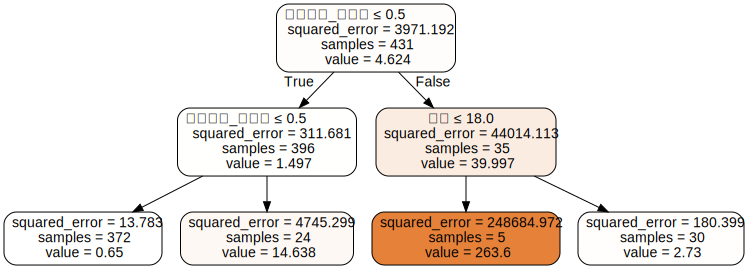

In [20]:
#tree 시각화
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("tree", format='png')  
graph